In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elikplim/eergy-efficiency-dataset")

print("Path to dataset files:", path)





Path to dataset files: C:\Users\gogir\.cache\kagglehub\datasets\elikplim\eergy-efficiency-dataset\versions\1


In [2]:
import pandas as pd

# Path to your dataset
dataset_path = './energy-efficiency-dataset/versions/1/ENB2012_data.csv'

# Check if the path is not None and load the dataset
if dataset_path:
    try:
        energy_efficiency_dataset = pd.read_csv(dataset_path)
        print("Dataset loaded successfully!")
        #print(energy_efficiency_dataset.head())  # Display the first few rows
    except FileNotFoundError:
        print(f"File not found at the path: {dataset_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("Dataset path is None. Please provide a valid path.")


Dataset loaded successfully!


In [3]:
energy_efficiency_dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
energy_efficiency_dataset.info()

#check number of coulmns and rows

nRow, nCol = energy_efficiency_dataset.shape
print(f'There are {nRow} rows and {nCol} columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB
There are 768 rows and 10 columns


In [5]:


def rename_columns(data):
    """
    This function renames each column in the dataset according to the original data notes.
    """
    column_mapping = {
        "X1": "Relative Compactness",
        "X2": "Surface Area",
        "X3": "Wall Area",
        "X4": "Roof Area",
        "X5": "Overall Height",
        "X6": "Orientation",
        "X7": "Glazing Area",
        "X8": "Glazing Area Distribution",
        "Y1": "Heating Load",
        "Y2": "Cooling Load"
    }
    
    # Rename the columns
    data.rename(columns=column_mapping, inplace=True)
    return data


# Rename columns
energy_efficiency_dataset = rename_columns(energy_efficiency_dataset)


In [6]:

# Check the renamed columns
energy_efficiency_dataset.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [7]:
def check_missing_values(data):
    """
    This function checks for missing values in the dataset 
    and prints the count of missing values for each column.
    """
    missing_values = data.isnull().sum()
    total_missing = missing_values.sum()

    #check
    
    if total_missing > 0:
        print("Missing values detected:")
        print(missing_values[missing_values > 0])
    else:
        print("No missing values in the dataset.")


#search for missing values
find_missing_values = check_missing_values(energy_efficiency_dataset)


No missing values in the dataset.


In [8]:
energy_efficiency_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [9]:
energy_efficiency_dataset.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


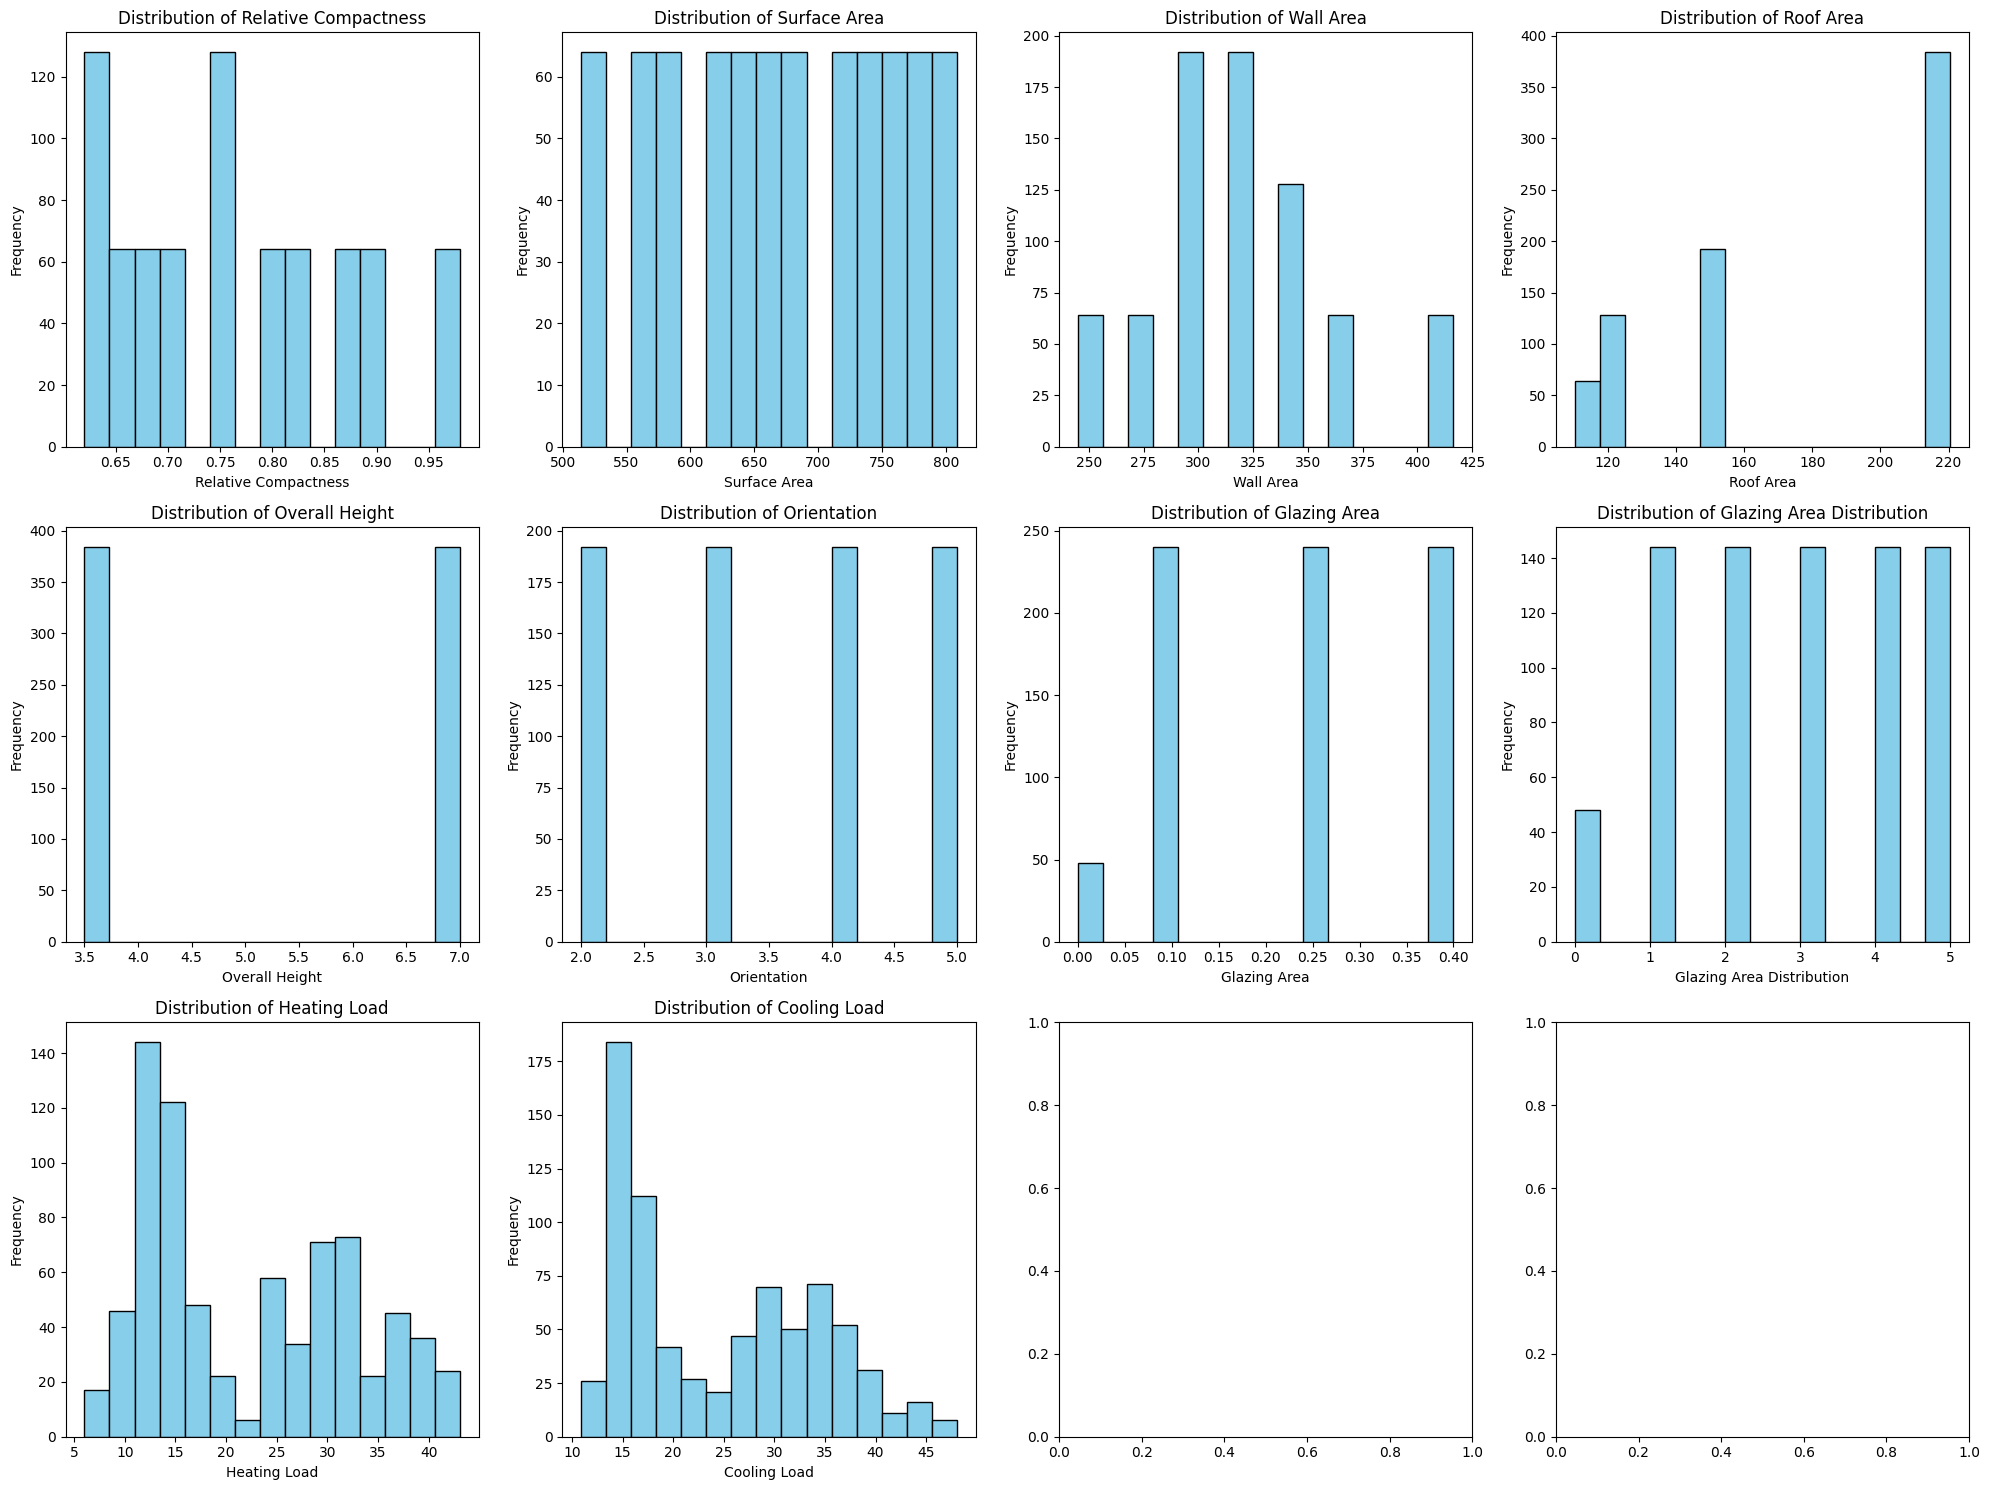

In [10]:
import matplotlib.pyplot as plt

def plotPerColumnDistribution(data, num_rows, num_cols):
    """
    This function plots the distribution of each column in the dataset.
    
    Parameters:
    data (DataFrame): The dataset to plot.
    num_rows (int): The number of rows in the grid of subplots.
    num_cols (int): The number of columns in the grid of subplots.
    """
    num_features = data.shape[1]
    
    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
    axes = axes.flatten()
    
    # Loop through each feature and plot its histogram
    for i, column in enumerate(data.columns):
        if i < num_features:  # Ensure we don't exceed number of features
            axes[i].hist(data[column], bins=15, color='skyblue', edgecolor='black')
            axes[i].set_title(f'Distribution of {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# usage:
plotPerColumnDistribution(energy_efficiency_dataset, 3, 4)  # Adjust rows and columns as needed


If the value is close to 1 or -1, the features are highly correlated.
A positive correlation means they increase together, while a negative correlation means one increases as the other decreases.


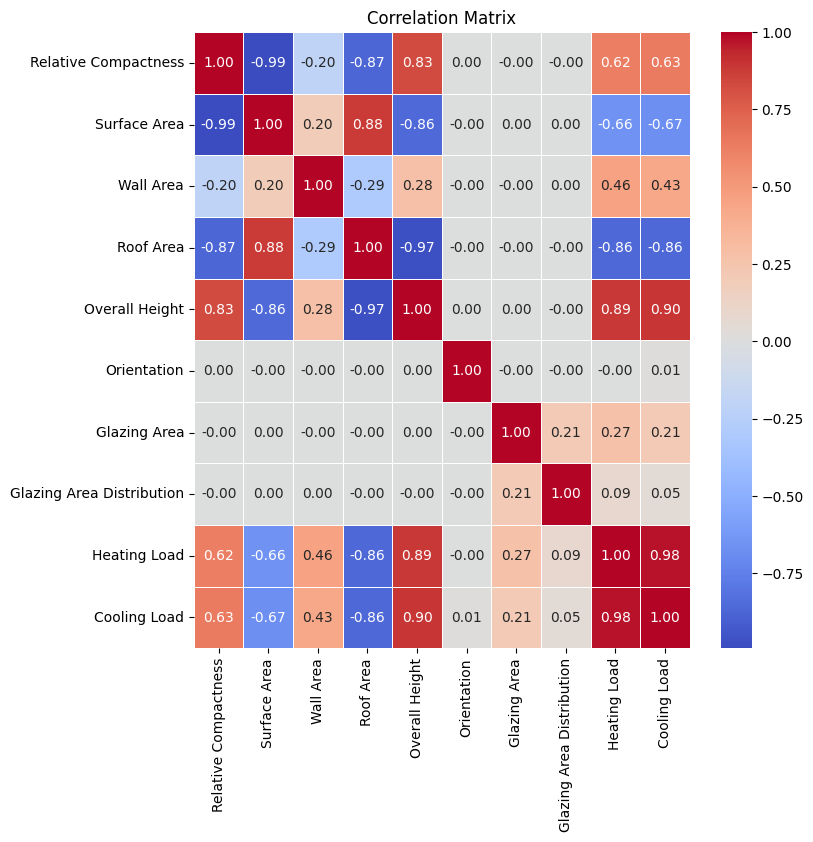

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def plotCorrelationMatrix(data, size):
    """
    This function plots a correlation matrix for the given dataset.
    
    Parameters:
    data (DataFrame): The dataset to plot.
    size (int): Size of the figure.
    """
    # Calculate the correlation matrix
    corr_matrix = data.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(size, size))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Matrix')

    # Provide a note on interpretation
    print('If the value is close to 1 or -1, the features are highly correlated.')
    print('A positive correlation means they increase together, while a negative correlation means one increases as the other decreases.')

    # Display the plot
    plt.show()

# Usage
plotCorrelationMatrix(energy_efficiency_dataset, 8)


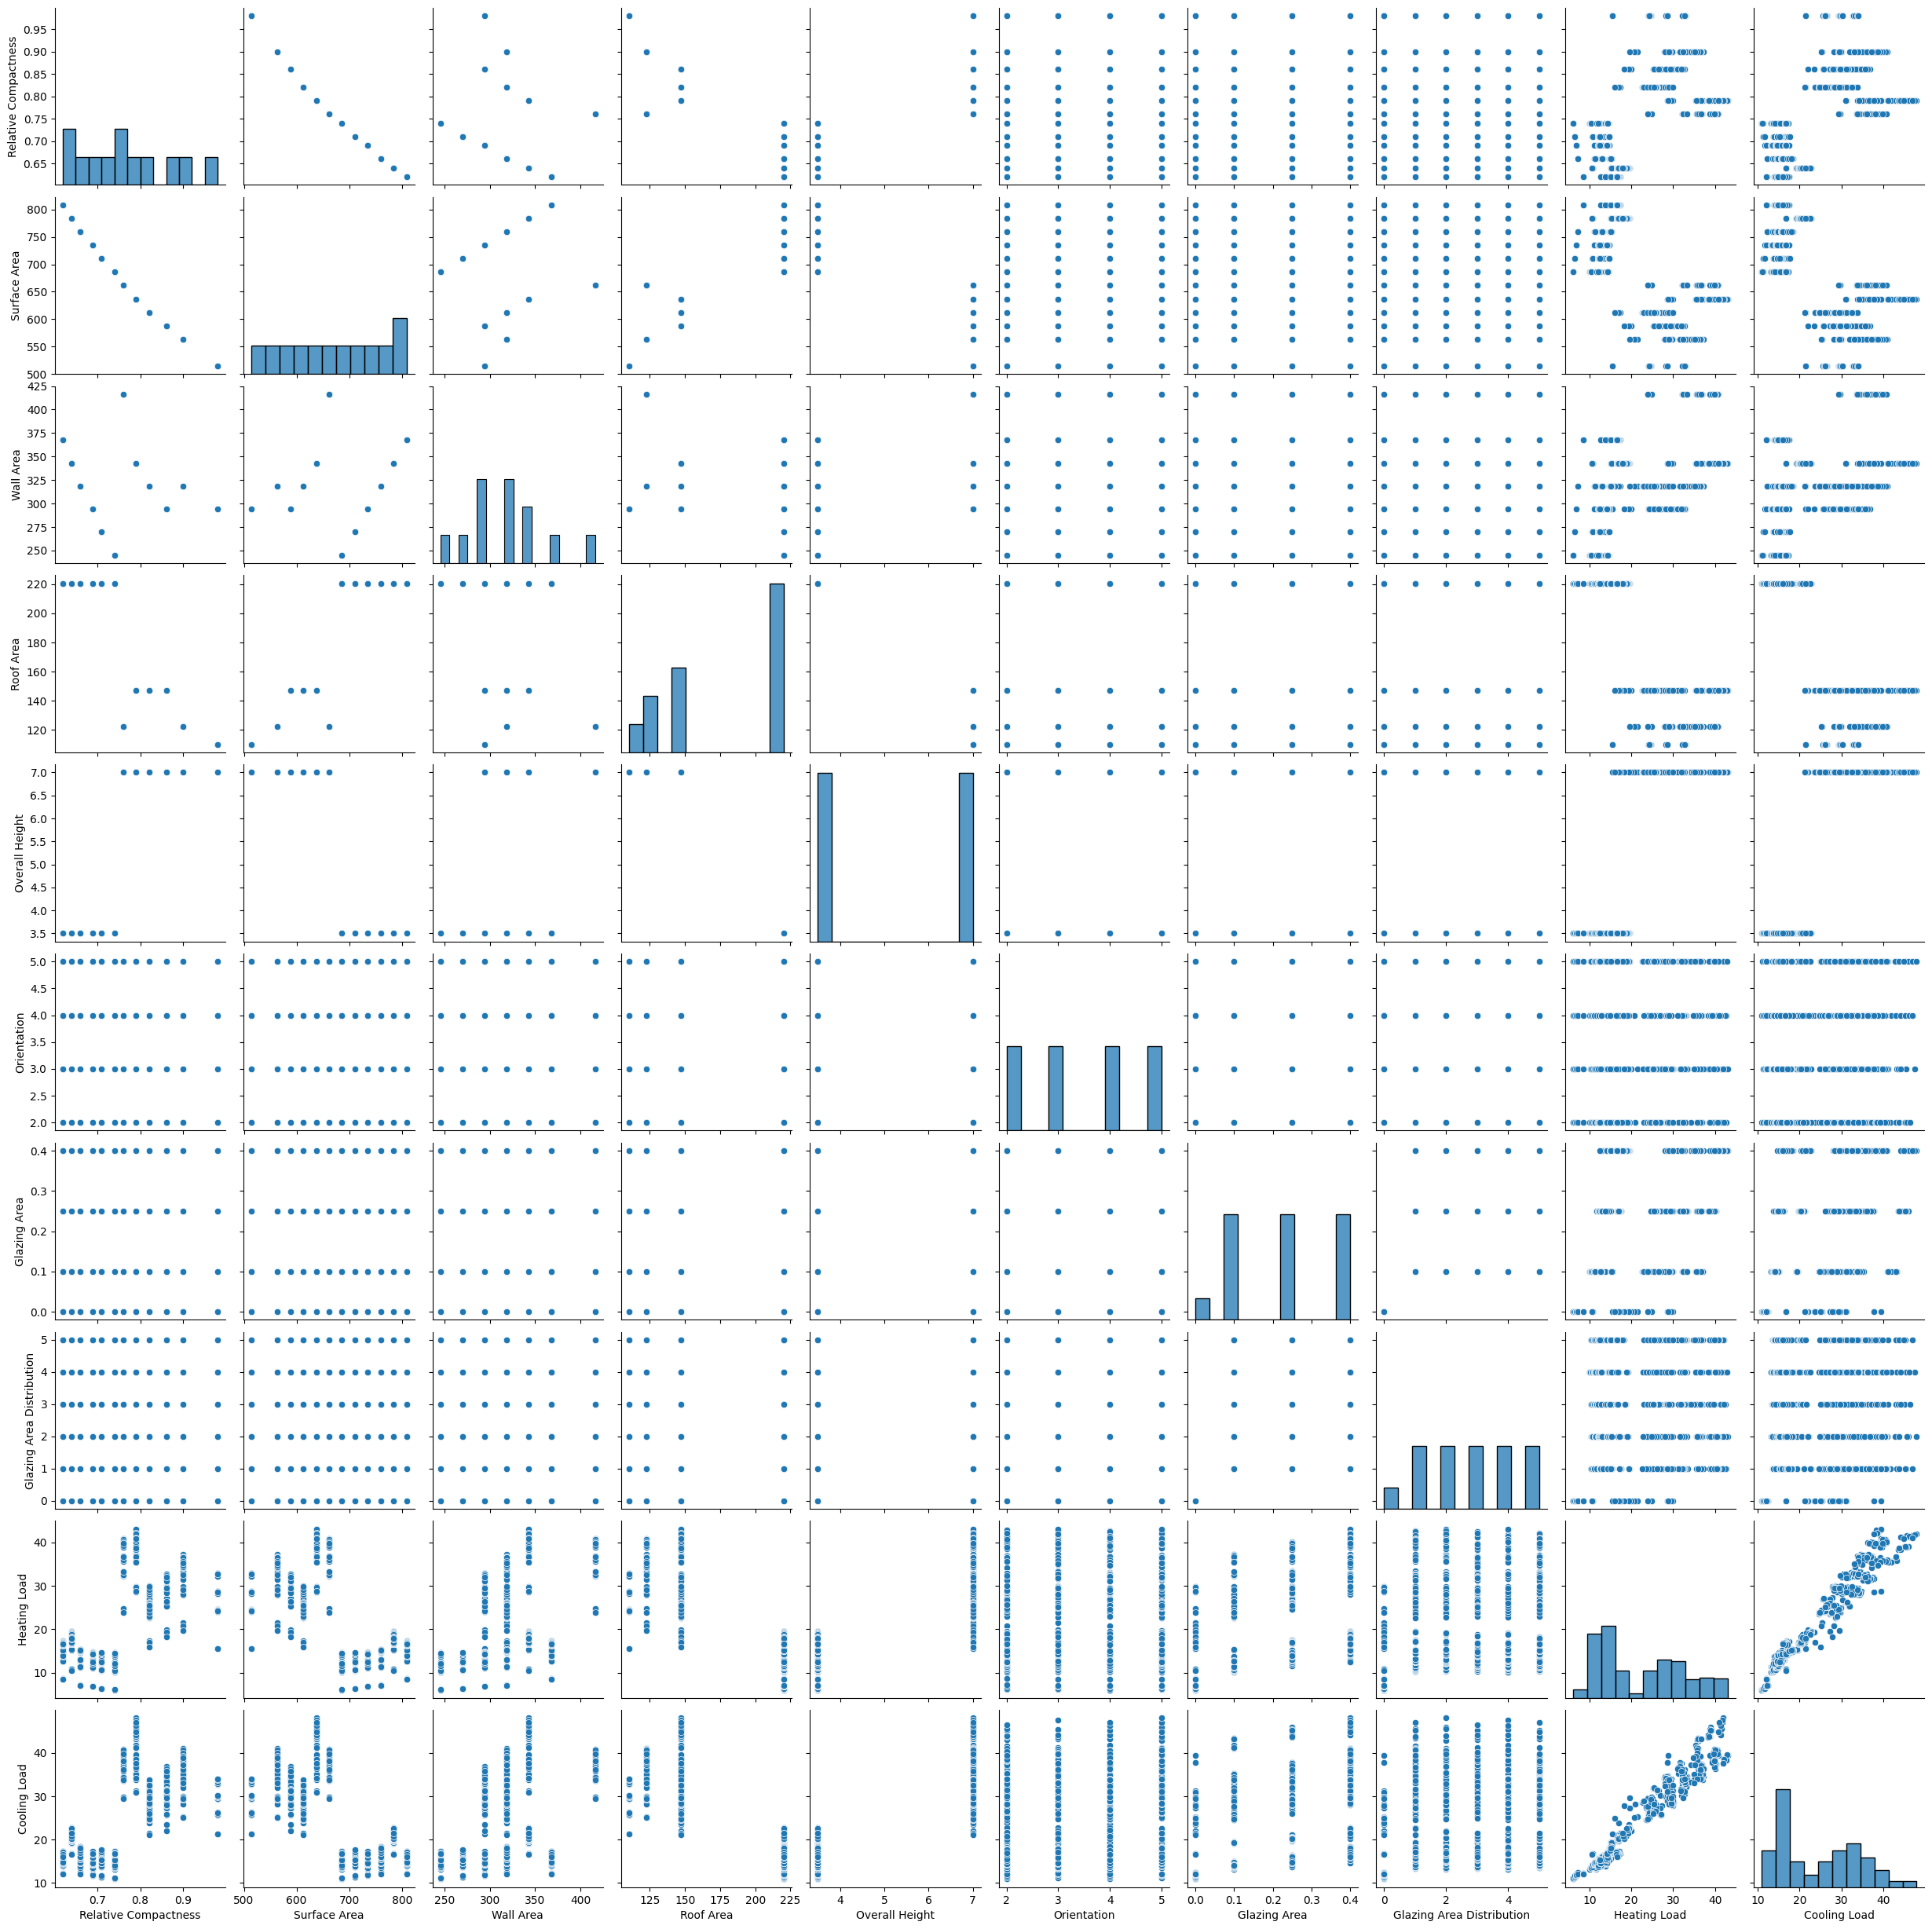

<Figure size 1000x100 with 0 Axes>

Guidance for Interpreting the Scatter Matrix:
1. Diagonal plots show the distribution (histogram) of each feature.
2. Off-diagonal plots show the scatter plots of two features, helping identify relationships.
3. Look for patterns or clusters, which indicate strong correlations.
4. Outliers and data spread can be identified visually in scatter plots.
5. Strong correlations often form linear or curved patterns in scatter plots.


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def plotScatterMatrix(data, size_x, size_y):
    """
    This function plots a scatter matrix (pairplot) for the given dataset.
    
    Parameters:
    data (DataFrame): The dataset to plot.
    size_x (int): Width of the plot.
    size_y (int): Height of the plot.
    """
    # Plot pairwise relationships in the dataset
    sns.pairplot(data)
    plt.figure(figsize=(size_x, size_y))
    plt.show()

    # Guidance:
    print("Guidance for Interpreting the Scatter Matrix:")
    print("1. Diagonal plots show the distribution (histogram) of each feature.")
    print("2. Off-diagonal plots show the scatter plots of two features, helping identify relationships.")
    print("3. Look for patterns or clusters, which indicate strong correlations.")
    print("4. Outliers and data spread can be identified visually in scatter plots.")
    print("5. Strong correlations often form linear or curved patterns in scatter plots.")

# Usage:
plotScatterMatrix(energy_efficiency_dataset, 10, 1)


In [13]:
import pandas as pd

def groupdata(data, threshold=0.9):
    '''Group data according to correlation relationships'''
    
    # Calculate the correlation matrix
    corr_matrix = data.corr()

    # Initialize an empty dictionary to store correlated groups
    correlated_data = {}

    try:
        # Iterate over the correlation matrix to identify highly correlated columns
        for col in corr_matrix.columns:
            # Find columns that have a correlation greater than the threshold (or less than -threshold)
            correlated_cols = corr_matrix.index[abs(corr_matrix[col]) >= threshold].tolist()
            
            # Remove the column itself from the list to avoid self-correlation
            correlated_cols.remove(col)
            
            # If any correlated columns are found, add them to the dictionary
            if len(correlated_cols) > 0:
                correlated_data[col] = correlated_cols

        if len(correlated_data) == 0:
            print("No strongly correlated groups found.")
        else:
            return correlated_data

    except Exception as e:
        print(f"An error occurred: {e}")

# Usage example:
correlated_groups = groupdata(energy_efficiency_dataset)
if correlated_groups:
    print("Correlated feature groups:")
    for key, value in correlated_groups.items():
        print(f"{key}: {value}")


Correlated feature groups:
Relative Compactness: ['Surface Area']
Surface Area: ['Relative Compactness']
Roof Area: ['Overall Height']
Overall Height: ['Roof Area']
Heating Load: ['Cooling Load']
Cooling Load: ['Heating Load']


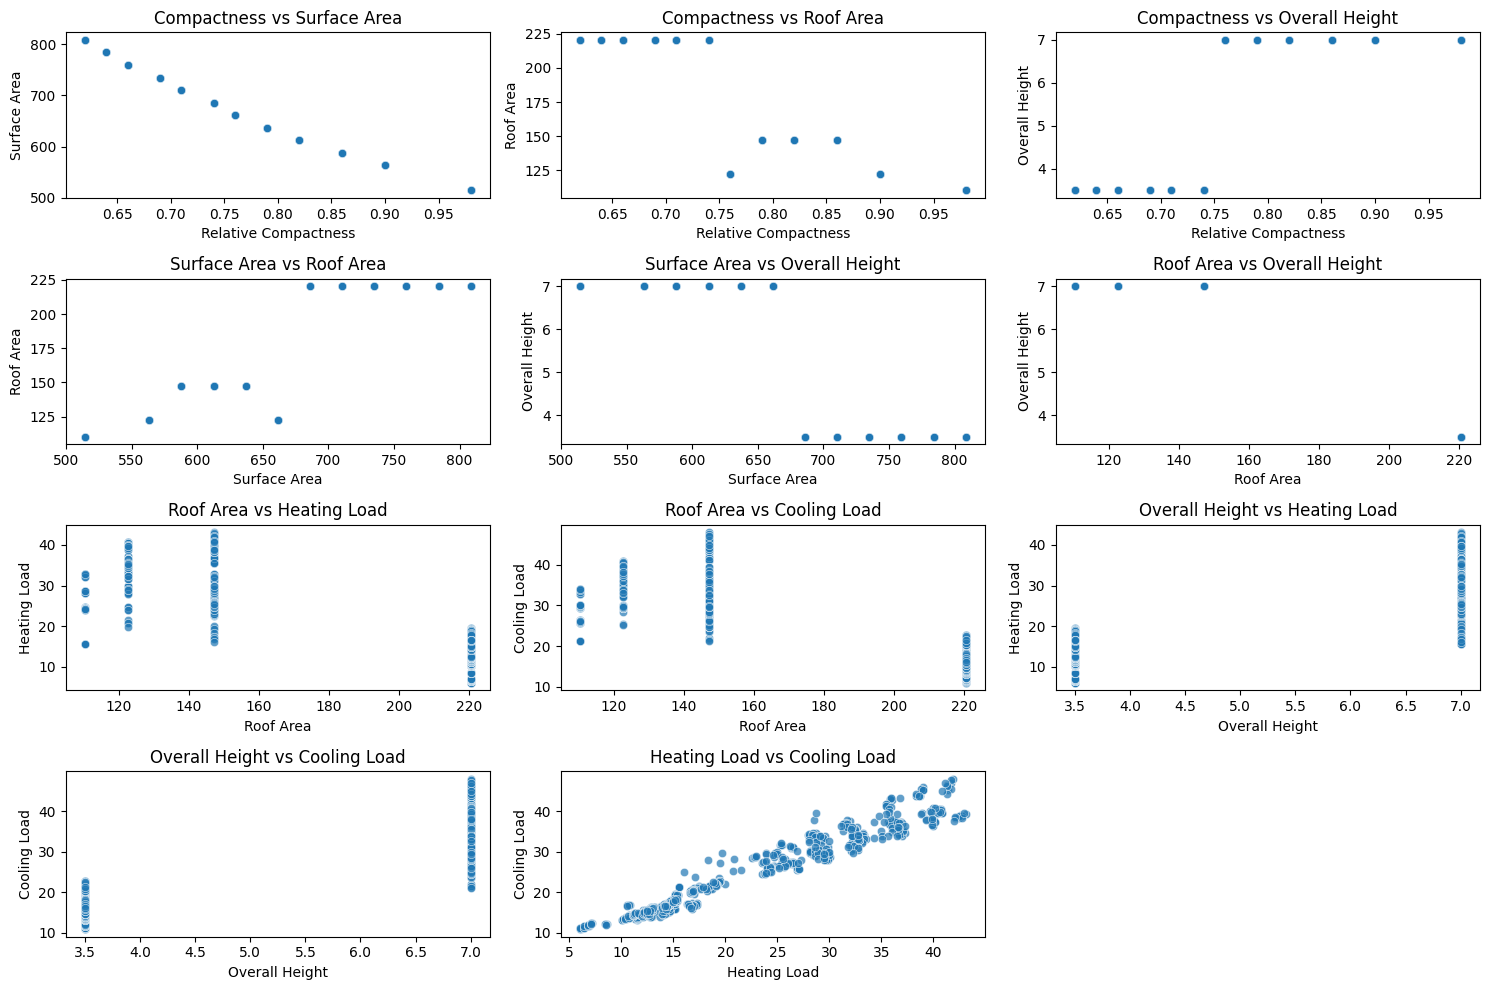

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up a grid for subplots
plt.figure(figsize=(15, 10))


def scatter_comparison(x, y, data, xlabel=None, ylabel=None, title=None, subplot_index=None):
    """
    Plots a scatter plot for two variables.

    Parameters:
    - x: str, column name for the x-axis
    - y: str, column name for the y-axis
    - data: DataFrame, the dataset containing the columns
    - xlabel: str, optional, label for the x-axis
    - ylabel: str, optional, label for the y-axis
    - title: str, optional, title of the plot
    - subplot_index: tuple, optional, subplot configuration (rows, cols, index)

    Returns:
    - None
    """
    try:
        if data is not None and x in data.columns and y in data.columns:
            if subplot_index:
                plt.subplot(*subplot_index)

            sns.scatterplot(x=x, y=y, data=data, alpha=0.7)
            plt.xlabel(xlabel if xlabel else x)
            plt.ylabel(ylabel if ylabel else y)
            if title:
                plt.title(title)
        else:
            print(f"Error: Columns '{x}' or '{y}' not found in the dataset.")
    except Exception as e:
        print(f"An error occurred: {e}")



# Scatter plot grid configuration
plots = [
    ("Relative Compactness", "Surface Area", "Compactness vs Surface Area", (4, 3, 1)),
    ("Relative Compactness", "Roof Area", "Compactness vs Roof Area", (4, 3, 2)),
    ("Relative Compactness", "Overall Height", "Compactness vs Overall Height", (4, 3, 3)),
    ("Surface Area", "Roof Area", "Surface Area vs Roof Area", (4, 3, 4)),
    ("Surface Area", "Overall Height", "Surface Area vs Overall Height", (4, 3, 5)),
    ("Roof Area", "Overall Height", "Roof Area vs Overall Height", (4, 3, 6)),
    ("Roof Area", "Heating Load", "Roof Area vs Heating Load", (4, 3, 7)),
    ("Roof Area", "Cooling Load", "Roof Area vs Cooling Load", (4, 3, 8)),
    ("Overall Height", "Heating Load", "Overall Height vs Heating Load", (4, 3, 9)),
    ("Overall Height", "Cooling Load", "Overall Height vs Cooling Load", (4, 3, 10)),
    ("Heating Load", "Cooling Load", "Heating Load vs Cooling Load", (4, 3, 11)),
]


# Plot all scatter plots
for x, y, title, subplot_index in plots:
    scatter_comparison(
        x=x, y=y, data=energy_efficiency_dataset, title=title, subplot_index=subplot_index
    )

# Show all plots
plt.tight_layout()
plt.show()



KeyError: "None of [Index(['cooling_load', 'glazing_area', 'glazing_area_distribution'], dtype='object')] are in the [columns]"